In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from src.ingestion import download_from_drive

# Profilo Finanziario

In [11]:
df_profinanz = download_from_drive("csv_startup_profilo_finanziario")

In [14]:
df_profinanz.columns

Index(['Unnamed: 0', 'Ragione sociale', 'BvD ID number',
       'Ricavi delle vendite\nmigl EUR\nUltimo anno disp.',
       'Ricavi delle vendite\nmigl EUR\n2023',
       'Ricavi delle vendite\nmigl EUR\n2022',
       'Ricavi delle vendite\nmigl EUR\n2021',
       'EBITDA\nmigl EUR\nUltimo anno disp.', 'EBITDA\nmigl EUR\n2023',
       'EBITDA\nmigl EUR\n2022', 'EBITDA\nmigl EUR\n2021',
       'Utile Netto\nmigl EUR\nUltimo anno disp.',
       'Utile Netto\nmigl EUR\n2023', 'Utile Netto\nmigl EUR\n2022',
       'Utile Netto\nmigl EUR\n2021',
       'Totale Attività\nmigl EUR\nUltimo anno disp.',
       'Totale Attività\nmigl EUR\n2023', 'Totale Attività\nmigl EUR\n2022',
       'Totale Attività\nmigl EUR\n2021',
       'Patrimonio Netto\nmigl EUR\nUltimo anno disp.',
       'Patrimonio Netto\nmigl EUR\n2023', 'Patrimonio Netto\nmigl EUR\n2022',
       'Patrimonio Netto\nmigl EUR\n2021',
       'Posizione finanziaria netta\nmigl EUR\nUltimo anno disp.',
       'Posizione finanziaria nett

# Azionisti

In [24]:
df_azionisti = download_from_drive("csv_azionisti")

In [9]:
df_azionisti["Stato giuridico"].value_counts()

Stato giuridico
Attiva                                  11615
In liquidazione                           342
Attiva (con procedure di insolvenza)        9
Cessata (Fusione)                           1
Name: count, dtype: int64

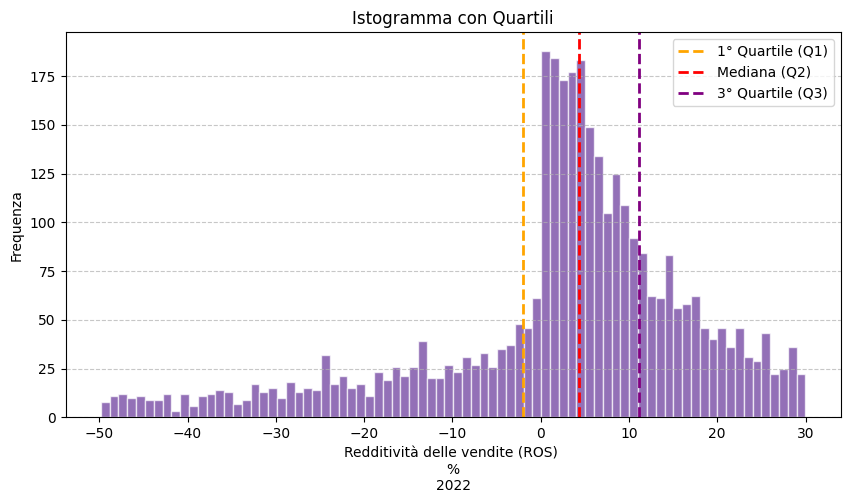

In [23]:
col_name = 'Redditività delle vendite (ROS) \n%\n2022'
bins = 80
data = df_profinanz[col_name]
#eliminare n.s e n.a
data = data.replace("n.s.", np.nan)
data = data.replace("n.d.", np.nan)
data = data.dropna()
#filtra valori numerici
data = data.astype(float)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()

# Startup Anagrafica

In [ ]:
# Import dataframe
df_s_anagrafica = download_from_drive("csv_startup_anagrafica")

# Settare index su colonna Unamed: 0
df_s_anagrafica.set_index("Unnamed: 0", inplace=True)

# Rinominare colonna Unnamed: 0 in Index
df_s_anagrafica.index.name = "Index"

# Rinominare colonna ATECO 2007 codice in ATECO
df_s_anagrafica.rename(columns={"ATECO 2007\ncodice": "ATECO"}, inplace=True)

## Foundation Year (Pre and Post 2019)

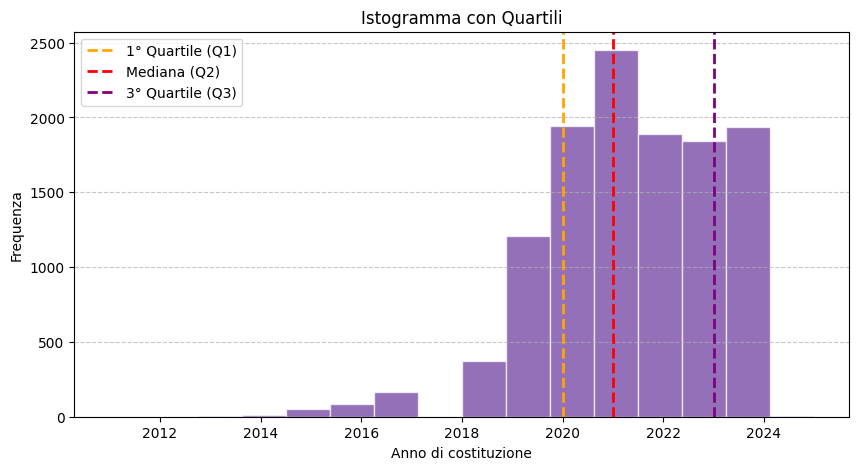

In [ ]:
# Suddivisione per anno di costituzione 
# DA FINIRE 

col_name = 'Anno di costituzione'
bins = 16
data = df_s_anagrafica[col_name]
#mantenere solamente le ultime 4 cifre della data
data = data.apply(lambda x: int(str(x)[-4:]))
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()

In [40]:
# Creare df con startup costituite dal 2019 in avanti (facendo riferimento alle ultime 4 cifre dalla data di costituzione)
df_s_anagrafica["Anno di costituzione"] = df_s_anagrafica["Anno di costituzione"].apply(lambda x: int(str(x)[-4:]))
df_s_anagrafica_post2019 = df_s_anagrafica[df_s_anagrafica["Anno di costituzione"] >= 2019]

In [42]:
# Create df with startup founded before 2019
df_s_anagrafica["Anno di costituzione"] = df_s_anagrafica["Anno di costituzione"].apply(lambda x: int(str(x)[-4:]))
df_s_anagrafica_pre2019 = df_s_anagrafica[df_s_anagrafica["Anno di costituzione"] < 2019]

In [41]:
df_s_anagrafica_post2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11275 entries, 1.0 to 11967.0
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Ragione sociale                         11275 non-null  object 
 1   BvD ID number                           11275 non-null  object 
 2   Codice fiscale                          11275 non-null  int64  
 3   Numero CCIAA                            11275 non-null  object 
 4   Partita IVA                             11263 non-null  float64
 5   Indirizzo sede legale                   11275 non-null  object 
 6   Provincia                               11263 non-null  object 
 7   Indirizzo sede legale - Codice postale  11243 non-null  float64
 8   Indirizzo sede legale - Regione         11263 non-null  object 
 9   Sede operativa                          1837 non-null   object 
 10  Sede operativa - Provincia              1828 non-null   obj

Si osserva che solo 1837 Startup indicano una sede operativa: sono le uniche che hanno sede operativa diversa da sede legale

In [45]:
# Create df with startup grouped by region
df_s_anagrafica_post2019["Indirizzo sede legale - Regione"].value_counts()

Indirizzo sede legale - Regione
Lombardia                       3265
Lazio                           1334
Campania                        1179
Emilia-Romagna                   864
Veneto                           709
Piemonte                         643
Puglia                           525
Toscana                          488
Sicilia                          444
Marche                           336
Liguria                          232
Trentino-Alto Adige/Südtirol     229
Friuli-Venezia Giulia            200
Abruzzo                          190
Calabria                         186
Umbria                           142
Sardegna                         139
Basilicata                       100
Molise                            45
Valle d'Aosta/Vallée d'Aoste      13
Name: count, dtype: int64

In [ ]:
#GRAFICO DISTRIBUZIONE IN REGIONI